In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv")

# Part 1. Data Understanding.
- Display first rows of the dataframe;
- Compare dtypes from dataset details with current dataframe;
- Check for NaN values;

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.shape

(991346, 24)

In [5]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [6]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

# Part 2. Data Preparation.
- Rename features for clarity;
- Transform into proper dtype;
- Split categorical & numeric features into separate dataframes.

In [7]:
# Rename columns for better clarity.
df = df.rename(columns={'DRK_YN': 'drinking', 'SMK_stat_type_cd': 'smoking'})
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking,drinking
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### Small note

In dataset details **SMK_stat_type_cd**, **hear_left**, **hear_right** were described as categorical features but in actual dataframe they defined as *float64*, so we transform them into string in future steps.

In [8]:
cat_features = ['sex', 'drinking', 'smoking', 'hear_left', 'hear_right']

In [9]:
df[cat_features] = df[cat_features].astype(str)  # Transform into categorical features.
df[cat_features].dtypes

sex           object
drinking      object
smoking       object
hear_left     object
hear_right    object
dtype: object

In [10]:
# Rename feature for clarity.
df['smoking'] = df['smoking'].replace({'1.0': 'never smoked', '2.0': 'quit smoking', '3.0': 'currently smoking'})
df['drinking'] = df['drinking'].replace({"Y": "currently drinking", "N": "not drinking"})

Next we can split data into numeric and categorical dataframes.

In [11]:
df_num = df.drop(columns=cat_features, axis=0)
df_cat = df[cat_features]

# Part 3. Feature Understanding.
- Countplots  for categorical features;
- Histograms & heatmap for numeric features;
- Boxplots for categorical & numeric feauteres.

<Axes: xlabel='drinking', ylabel='count'>

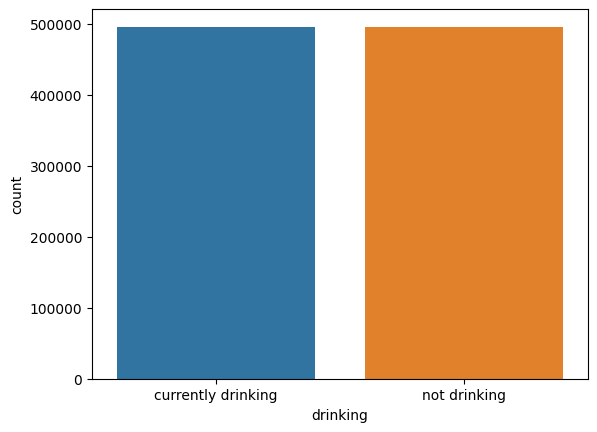

In [12]:
sns.countplot(df_cat, x='drinking') 

In [13]:
df_cat['drinking'].value_counts()  # ~ 50/50 distribution.

drinking
not drinking          495858
currently drinking    495488
Name: count, dtype: int64

As shown above, target feature discributed evenly so if necessary we can use accuracy as a metric.

<Axes: xlabel='smoking', ylabel='count'>

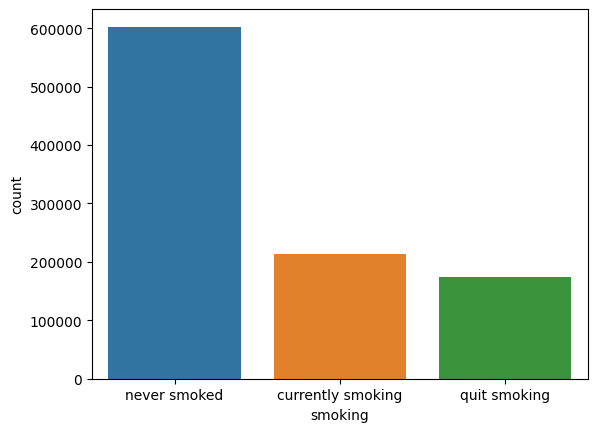

In [14]:
sns.countplot(df_cat, x='smoking')

<Axes: xlabel='drinking', ylabel='count'>

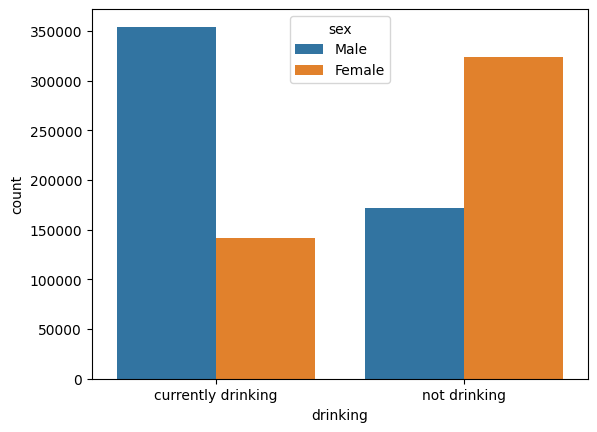

In [15]:
sns.countplot(df_cat, x='drinking', hue='sex')

<Axes: xlabel='smoking', ylabel='count'>

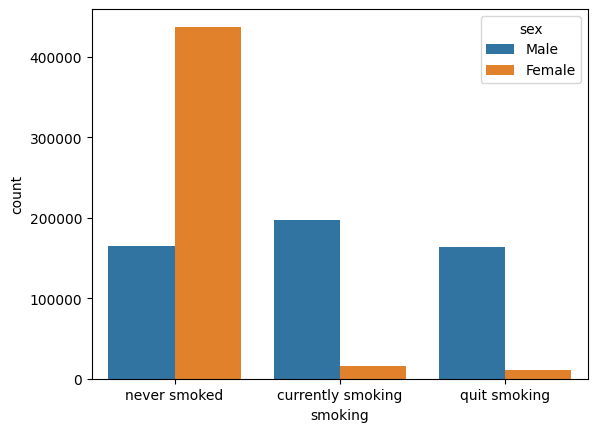

In [16]:
sns.countplot(df_cat, x='smoking', hue='sex')

<Axes: xlabel='drinking', ylabel='count'>

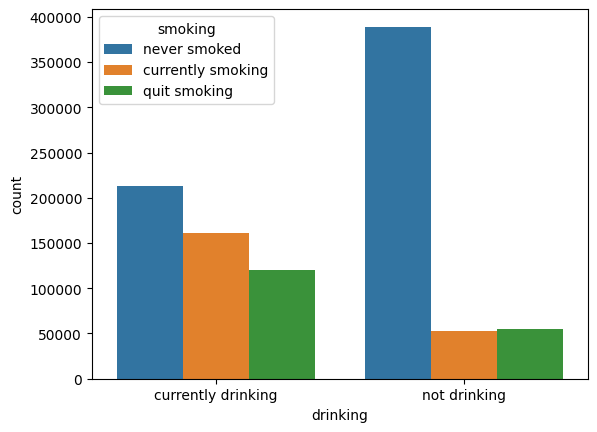

In [17]:
sns.countplot(df_cat, x='drinking', hue='smoking')

Looks like drinking and smoking correlate well. People who don't drink also usually don't smoke.

<Axes: xlabel='drinking', ylabel='count'>

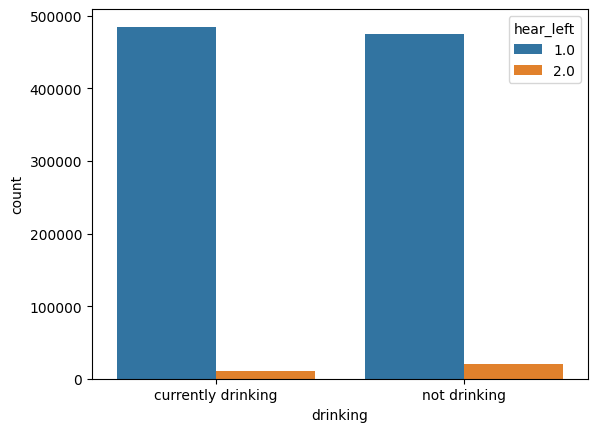

In [18]:
sns.countplot(df_cat, x='drinking', hue='hear_left')

<Axes: xlabel='drinking', ylabel='count'>

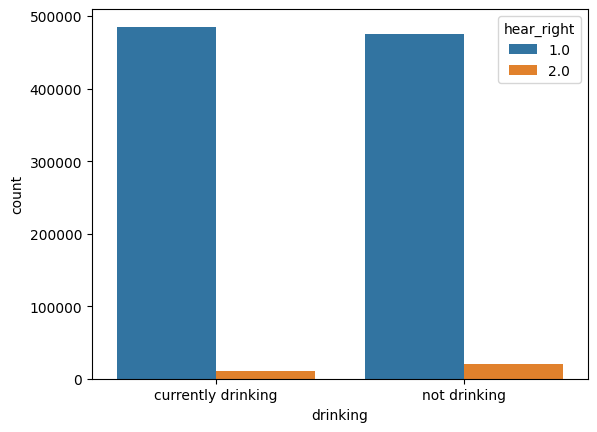

In [19]:
sns.countplot(df_cat, x='drinking', hue='hear_right')

A little exploration of human hearing after drinking. 

### Explore numeric features.

In [20]:
df_num.describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000


Some features have big outliers.

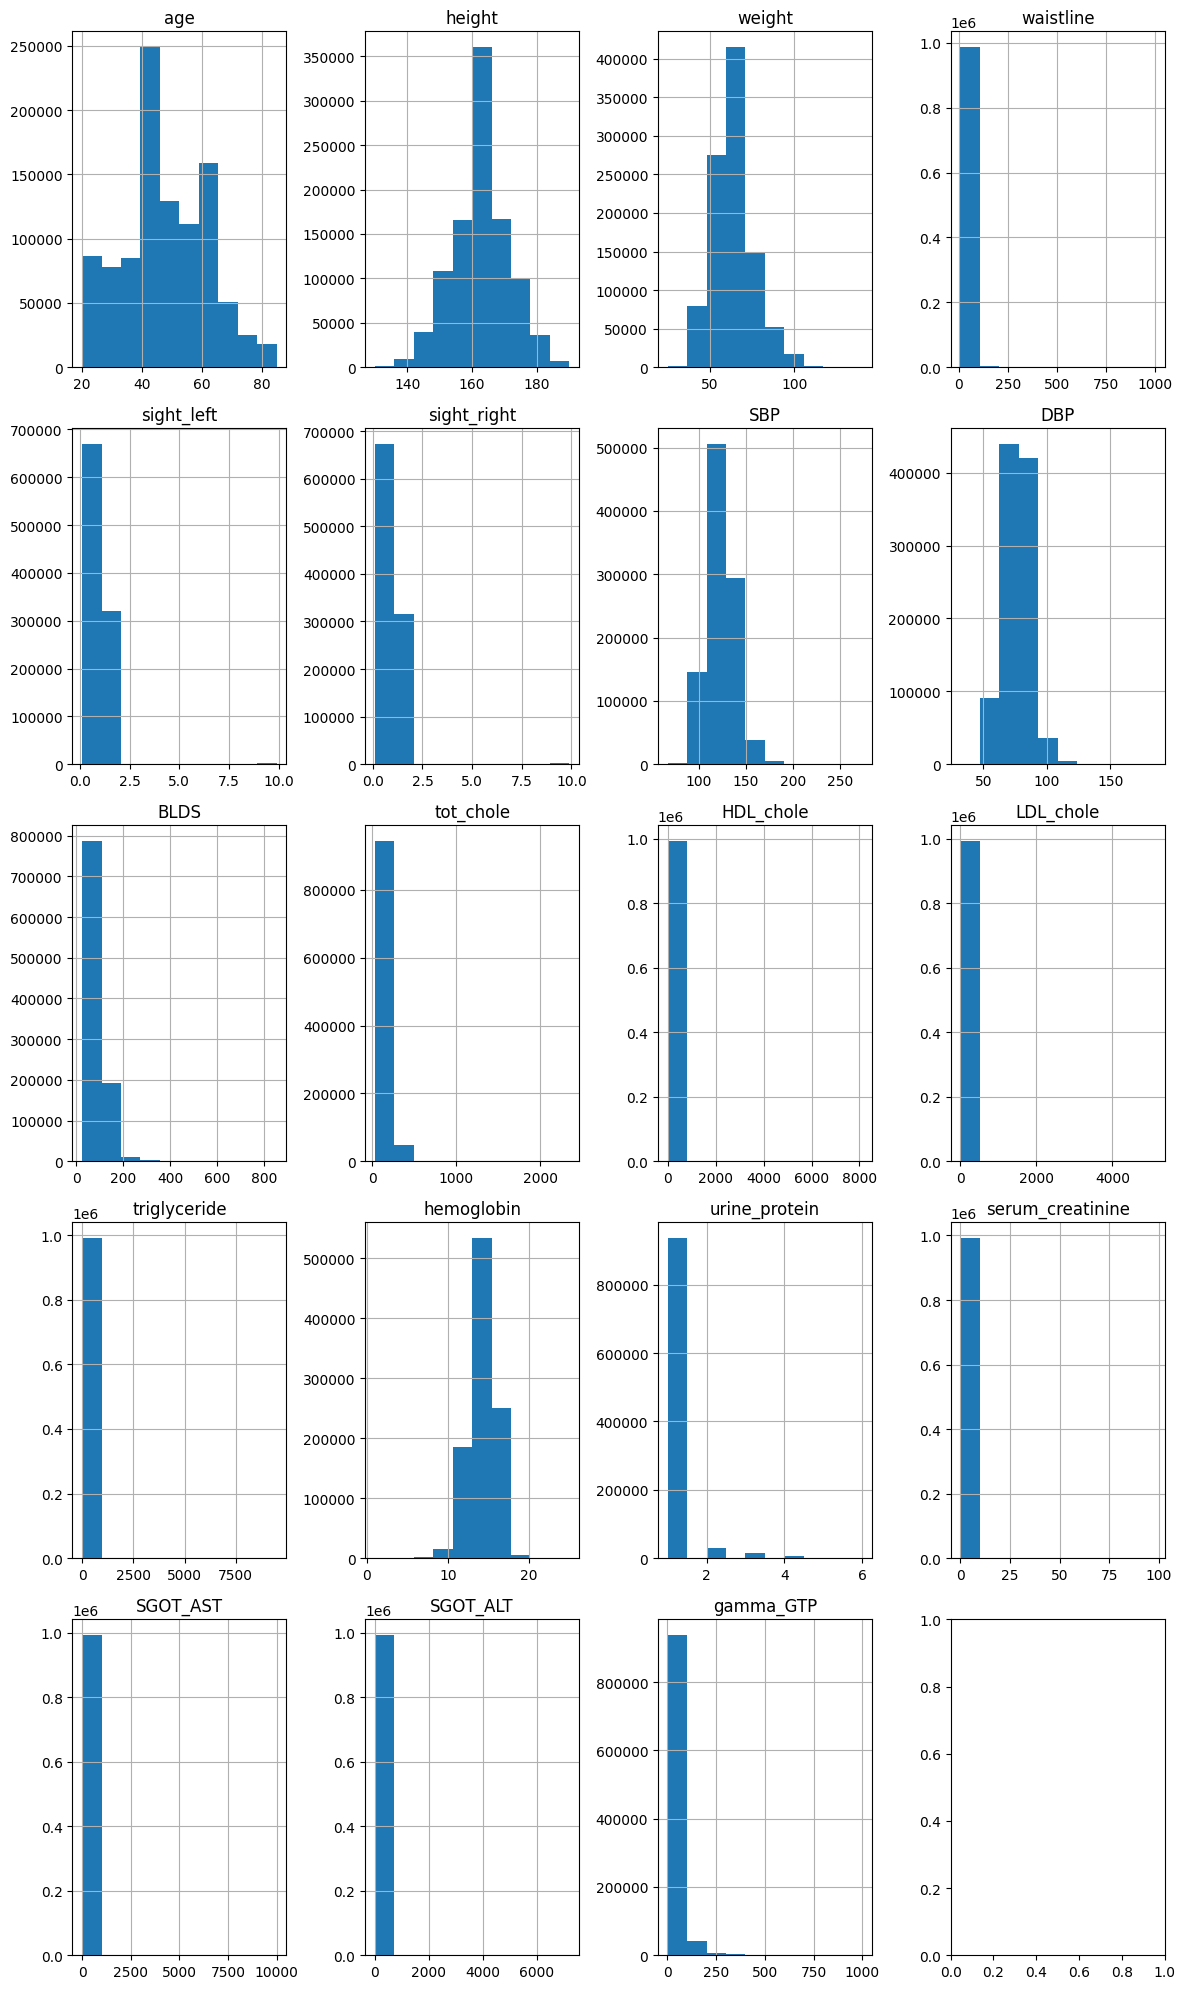

In [21]:
num_rows = (len(df_num.columns) + 2) // 4
num_cols = min(len(df_num.columns), 4)

fix, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

axes = axes.flatten()

for i, feature in enumerate(df_num.columns):
    if i < len(axes):
        df_num[feature].hist(ax=axes[i])
        axes[i].set_title(feature)
        
plt.tight_layout()
plt.show()

<Axes: >

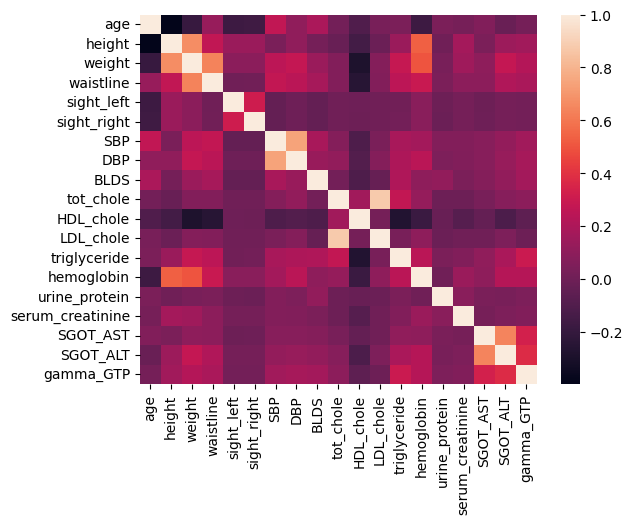

In [22]:
sns.heatmap(df_num.corr())

### Examine target with numeric features.

<Axes: xlabel='drinking', ylabel='age'>

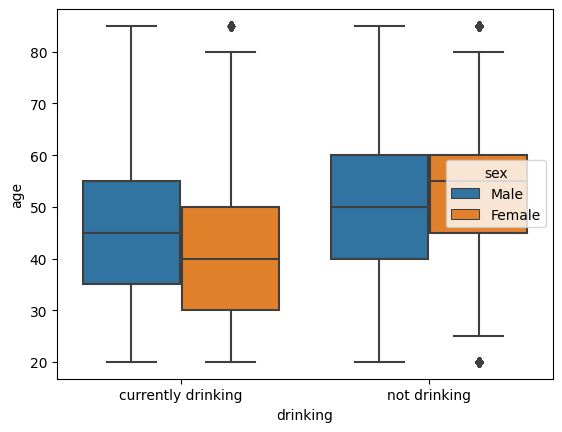

In [23]:
sns.boxplot(x='drinking', y='age', data=df, hue='sex')

<Axes: xlabel='smoking', ylabel='age'>

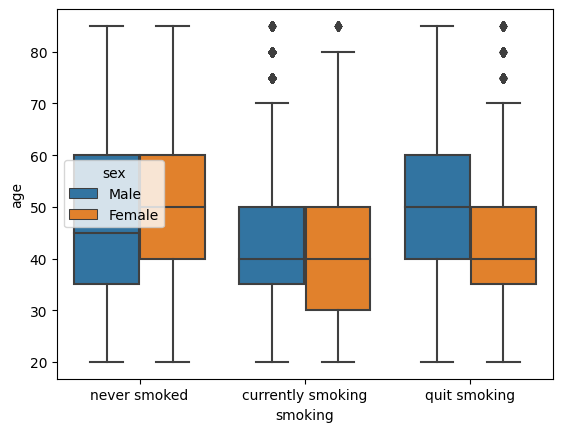

In [24]:
sns.boxplot(x='smoking', y='age', data=df, hue='sex')

<Axes: xlabel='drinking', ylabel='age'>

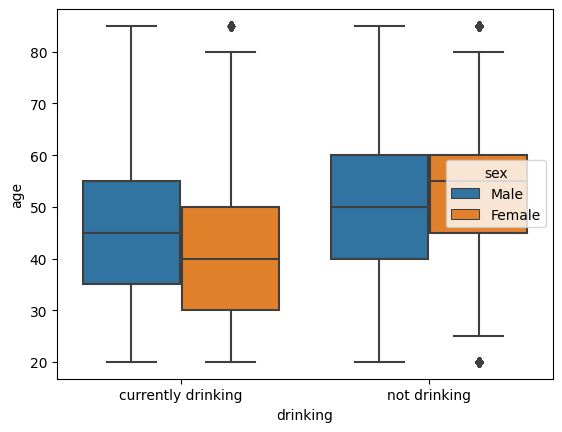

In [25]:
sns.boxplot(x='drinking', y='age', data=df, hue='sex')

Looks like age affects whether a person drinks alcohol.

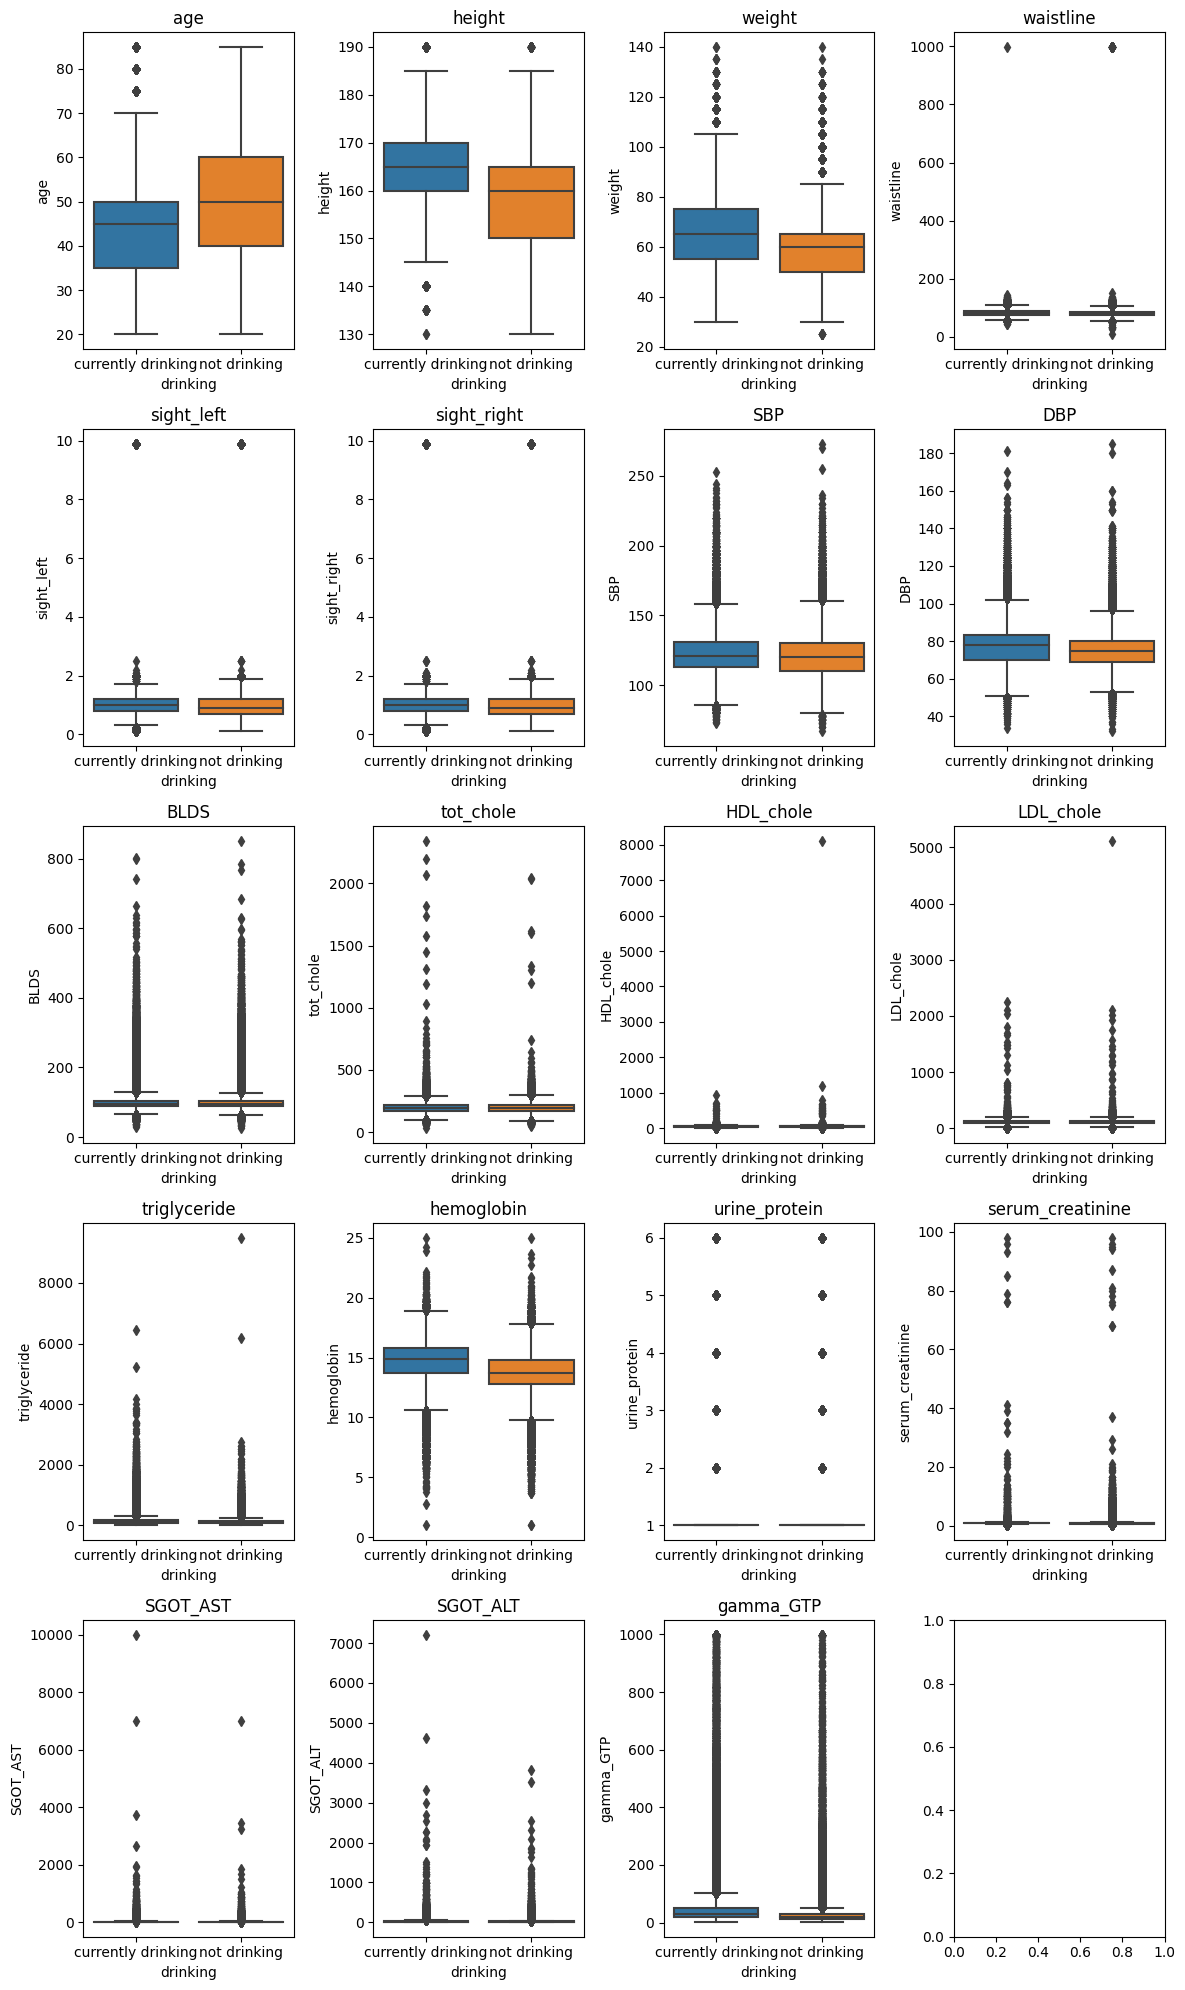

In [26]:
# Explore outliers in graph form.

num_rows = (len(df_num.columns) + 2) // 4
num_cols = min(len(df_num.columns), 4)

fix, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

axes = axes.flatten()

for i, feature in enumerate(df_num.columns):
    if i < len(axes):
        sns.boxplot(x='drinking', y=feature, data=df, ax=axes[i])
        axes[i].set_title(feature)
        
plt.tight_layout()
plt.show()

## Initial Data Exploration Conclusion

1. Target feature evenly distributed so accuracy can be used as metric for model evaluation.
2. Most drinkers are men.
3. Some numeric feature have big outliers.
4. Drinking and smoking seems to correlate well.
5. Looks like age affects whether a person drinks alcohol or not, especially for women.
6. Some features in the data are biological in nature and should be viewed with caution (i.e. height).

## Future Plans.
1. Investigate the reason of data outliers (Plot the with target feature?).
2. Most numeric feauters were not explored.
3. Deal with height feature that can cause some problems (females have shorter height).